# Phase portrait integrator

In [107]:
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [113]:
def rectangle_samples(X_bounds, X_dot_bounds, N):
    # Generates uniformly random samples from a specified rectangular region
    return jnp.array(np.random.uniform(X_bounds[0], X_bounds[1], N)), jnp.array(np.random.uniform(X_dot_bounds[0], X_dot_bounds[1], N))

def simulate_evolution(x, x_dot, delta, steps, U=None, F=None):
    # Simulates the time-evolution of a collection of trajectories
    # Note that the simulation is significantly faster when the gradient of U(x) (the force F) is provided directly
    if F is None:
        F = lambda x : -jax.vmap(jax.grad(U))(x) # I'm using JAX automatic differentiation to evaluate an exact derivative of the potential energy function
    x_ev, x_dot_ev = [], []
    
    y, z = x, x_dot
    for s in tqdm(range(steps)):
        acc = F(y)
        # First-order time-stepping for velocity, second-order time-stepping for position
        y, z = y + z * delta + 0.5 * acc * (delta ** 2), z + acc * delta
        x_ev.append(y)
        x_dot_ev.append(z)
    return x_ev, x_dot_ev

In [187]:
# Simulates the evolution for a particular U(x) (in this case, U(x) = -x^3 (x - 2) (x - 4))
def U(x):
    return -(x ** 3) * (x - 2) * (x - 4)

# Sets the parameters
X_bounds, X_dot_bounds = [-4, 4], [-6, 2]
N = 400 # 50 different trajectories
delta = 0.0005
T = 4000

 # Samples from rectangle
X_samples, X_dot_samples = rectangle_samples(X_bounds, X_dot_bounds, N)

# Runs the time evolution, generating trajectories
X, X_dot = simulate_evolution(X_samples, X_dot_samples, delta, T, U=U)

  0%|          | 0/4000 [00:00<?, ?it/s]

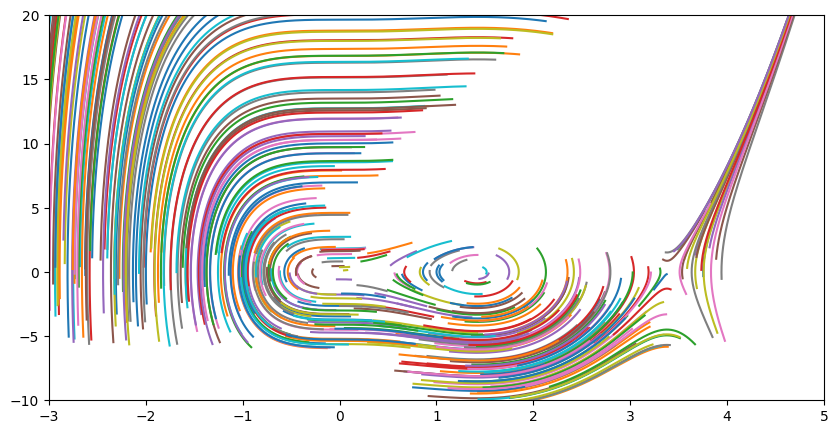

In [188]:
# Plots the resulting phase portrait, traced by the integrator, for a series of time steps (intervals of 500)
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:500], X_dot[0:500])
plt.show()

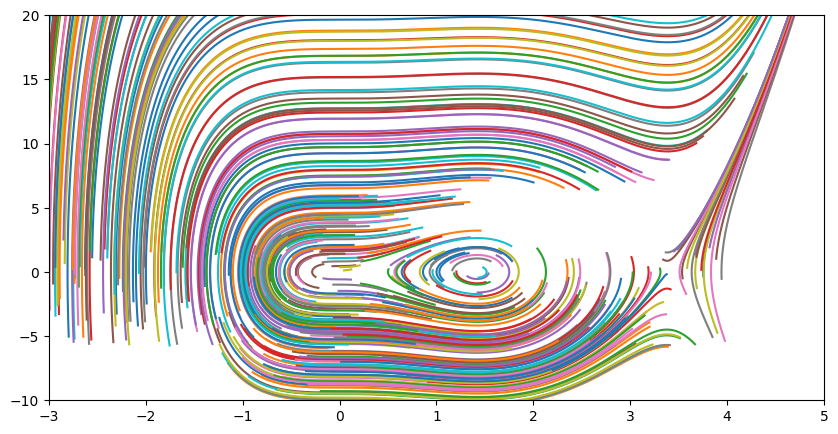

In [189]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:1000], X_dot[0:1000])
plt.show()

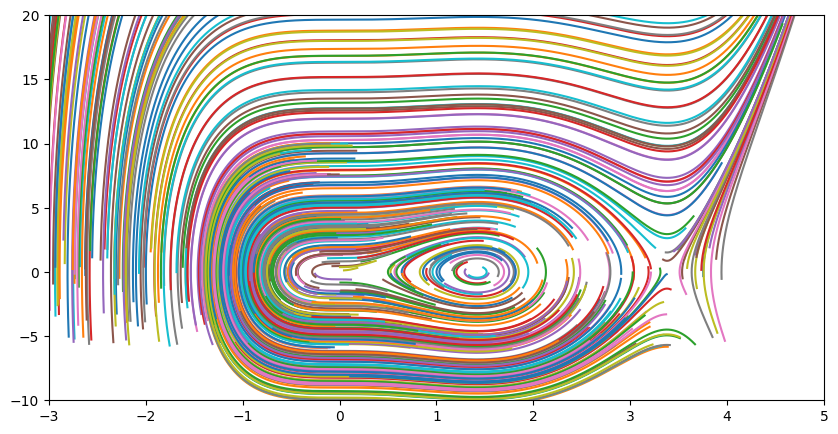

In [190]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:1500], X_dot[0:1500])
plt.show()

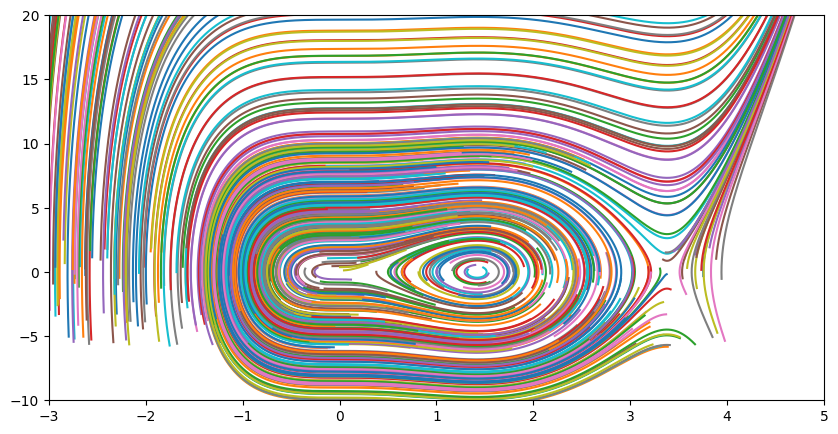

In [191]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:2000], X_dot[0:2000])
plt.show()

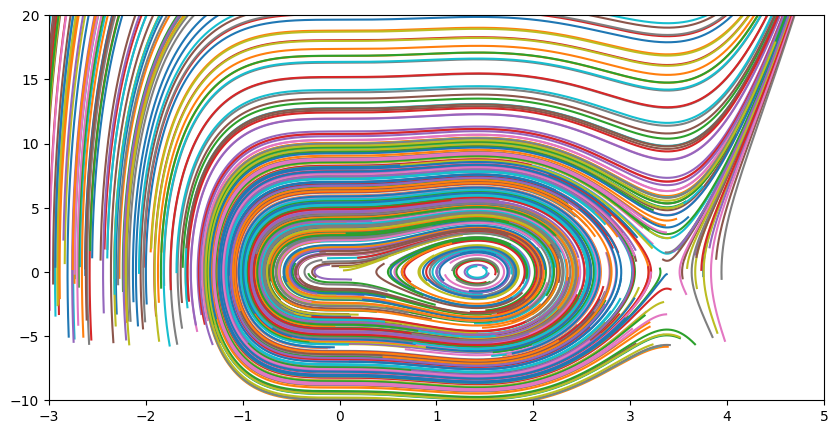

In [192]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:2500], X_dot[0:2500])
plt.show()

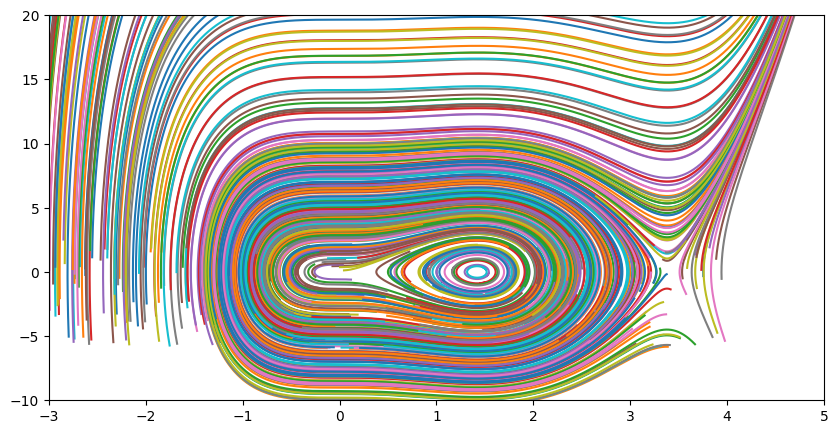

In [193]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:3000], X_dot[0:3000])
plt.show()

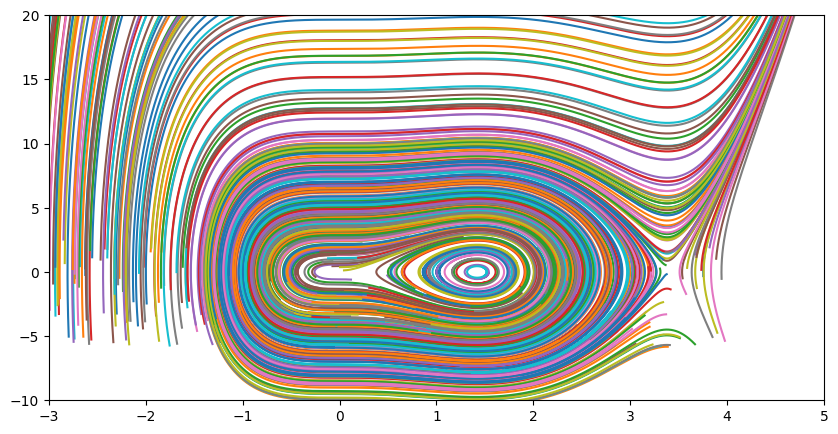

In [194]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:3500], X_dot[0:3500])
plt.show()

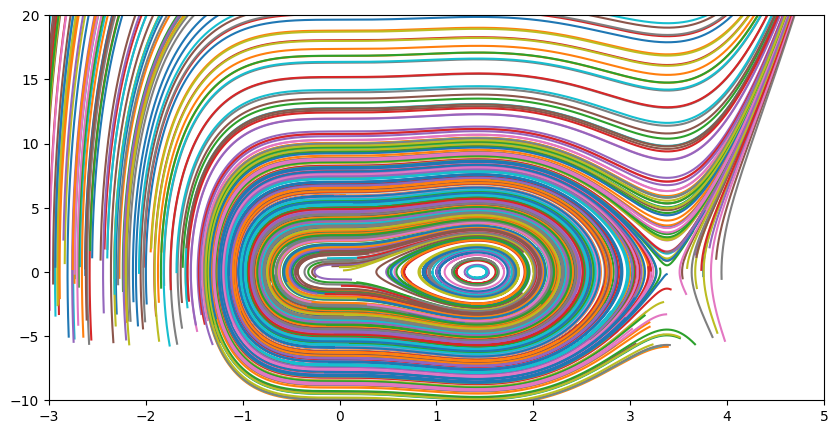

In [195]:
plt.figure(figsize=(10,5))
plt.xlim(right=5, left=-3)
plt.ylim(top=20, bottom=-10)
plt.plot(X[0:4000], X_dot[0:4000])
plt.show()